Pseudo-labeling

In [38]:

import pandas as pd
df = pd.read_csv("combined_sentiment_data.csv")
df

,published_date,title,description,polarity,sentiment,source,country_code,country_name
0,2020-10-20 18:30:00+00:00,Tariff shelter must be temporary,The reported move to have a sunset date for hi...,0.8225,positive,economictimes.indiatimes.com,my,Malaysia
1,2021-11-24 10:04:24+00:00,End the Trump-Biden Tariffs - The New York Times,An import tax on chassis is contributing to in...,0.4404,positive,nytimes.com,us,United States
2,2021-12-01 02:08:59+00:00,焦点：中国电子烟“完全禁止”风险解除 行业‘马太效应’初现、终端零售承压,中国国务院一纸修改烟草专卖法条例的公告，要求“电子烟等新型烟草制品参照卷烟的有关规定执行”，...,0.0000,neutral,cn.reuters.com,cn,China
3,2022-03-02 05:39:58+00:00,How Russia-Ukraine war might impact MSME expor...,"Trade, import and export for MSMEs: India’s ex...",-0.5994,negative,financialexpress.com,my,Malaysia
4,2022-06-16 14:40:01+00:00,WTO provisionally agrees to extend e-commerce ...,WTO members reached a provisional deal on Thur...,0.7003,positive,devdiscourse.com,my,Malaysia
...,...,...,...,...,...,...,...,...
963,2025-04-03 07:00:00+00:00,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,0.0000,neutral,BBC,gb,United Kingdom
964,2025-04-09 07:00:00+00:00,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",-0.4767,negative,BBC,gb,United Kingdom
965,2025-02-11 08:00:00+00:00,Why is Trump imposing tariffs and which countr...,Trump is tackling large trade deficits. But tr...,-0.0516,negative,The Guardian,gb,United Kingdom
966,2025-02-02 08:00:00+00:00,Trump says EU tariffs will ‘definitely happen’...,Trump says EU tariffs will 'definitely happen'...,0.4019,positive,The Guardian,gb,United Kingdom


In [39]:
print("Missing values\n", df.isnull().sum())
print("Data type of each column\n", df.dtypes)

Missing values
 published_date    0
title             0
description       3
polarity          0
sentiment         0
source            0
country_code      0
country_name      0
dtype: int64
Data type of each column
 published_date     object
title              object
description        object
polarity          float64
sentiment          object
source             object
country_code       object
country_name       object
dtype: object


In [40]:
from wordcloud import WordCloud
WordCloud().generate(" ".join(df['title']))

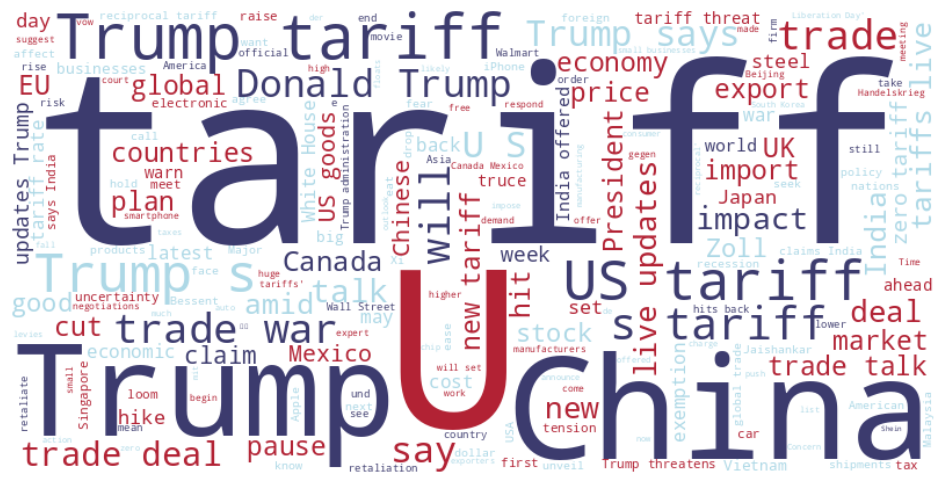

In [41]:

import matplotlib.pyplot as plt

usa_colors = ['#3C3B6E', '#ADD8E6', '#B22234']  # Blue, Light Blue, Red

def usa_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return usa_colors[font_size % len(usa_colors)]

text = " ".join(df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=usa_color_func), interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


Sentiment Distribution


In [42]:
df1 = pd.read_csv("Data/merged_noDuplicate.csv")


In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df1['text'] = df1['title'].fillna('') + '. ' + df1['snippet'].fillna('')
# Apply VADER
df1['vader_scores'] = df1['text'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound score and classify
df1['polarity'] = df1['vader_scores'].apply(lambda x: x['compound'])

def vader_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df1['sentiment'] = df1['polarity'].apply(vader_sentiment)



In [44]:
df1.to_csv("Data/merged_noDuplicate.csv")

In [45]:
print("Count of sentiments:",df['sentiment'].value_counts())
# df['compound'].describe()

Count of sentiments: sentiment
negative    486
positive    272
neutral     210
Name: count, dtype: int64


In [46]:
from plotly import graph_objs as go

# Prepare sentiment counts
sentiment_counts = df['sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

usa_colors = ['#3C3B6E', '#FFFFEE', '#B22234']  # Blue, White, Red

fig = go.Figure(
    go.Bar(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        marker_color=usa_colors
    )
)
fig.update_layout(
    title="Bar Chart of Sentiment Distribution",
    xaxis_title="Sentiment",
    yaxis_title="Count",
   
)
fig.show()

In [47]:

# Prepare sentiment counts
sentiment_counts = df['sentiment'].value_counts().reindex([ 'neutral','positive', 'negative'], fill_value=0)

usa_colors = ['#3C3B6E', '#FFFFEE', '#B22234']  # Blue, White, Red

fig = go.Figure(
    go.Funnel(
        y=sentiment_counts.index,
        x=sentiment_counts.values,
        marker_color=usa_colors
    )
)
fig.update_layout(
    title="Funnel Chart of Sentiment Distribution",
    xaxis_title="Count",
    yaxis_title="Sentiment"
)
fig.show()

In [48]:
average_polarity = df['polarity'].mean()
print(f"Average polarity score per article: {average_polarity:.4f}")

Average polarity score per article: -0.1252


In [49]:

sentiment_counts = df['sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Calculate mean polarity
mean_polarity = df['polarity'].mean()

fig = go.Figure(
    go.Bar(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        marker_color=usa_colors
    )
)

# Add mean polarity as annotation
fig.add_annotation(
    x=1,  # Place at 'neutral' bar (index 1)
    y=max(sentiment_counts.values),
    text=f"Mean Polarity: {mean_polarity:.2f}",
    showarrow=False,
    font=dict(color="black", size=14, family="Arial"),
    bgcolor="rgba(255,255,255,0.7)"
)

fig.update_layout(
    title="Bar Chart of Sentiment Distribution (with Mean Polarity)",
    xaxis_title="Sentiment",
    yaxis_title="Count",
    template="plotly_white"
)
fig.show()

### Analysis by Time

C:\Users\Yourisha\AppData\Local\Temp\ipykernel_7792\3572911040.py:4: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



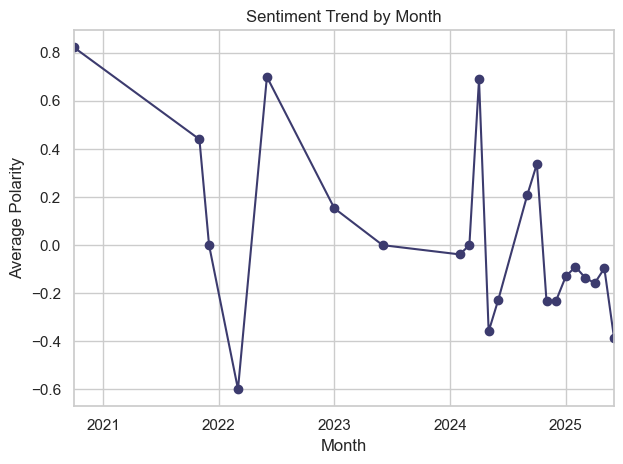

In [50]:

df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Group by month n year
monthly_trend = df.groupby(df['published_date'].dt.to_period('M'))['polarity'].mean()
yearly_trend = df.groupby(df['published_date'].dt.year)['polarity'].mean()  
    
ax = plt.gca()
monthly_trend.plot(ax=ax, marker='o', color='#3C3B6E')
ax.set_title('Sentiment Trend by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Polarity')
ax.grid(True)

plt.tight_layout()
plt.show()

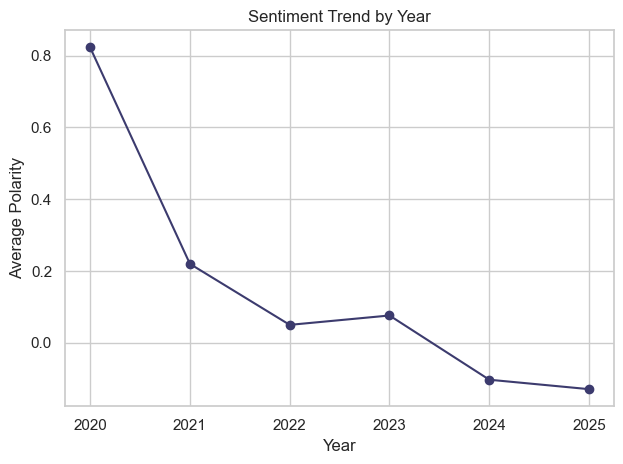

In [51]:
fig, ax_year = plt.subplots()
yearly_trend.plot(ax=ax_year, marker='o', color='#3C3B6E')
ax_year.set_title('Sentiment Trend by Year')
ax_year.set_xlabel('Year')
ax_year.set_ylabel('Average Polarity')
ax_year.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Yourisha\AppData\Local\Temp\ipykernel_7792\2586956852.py:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



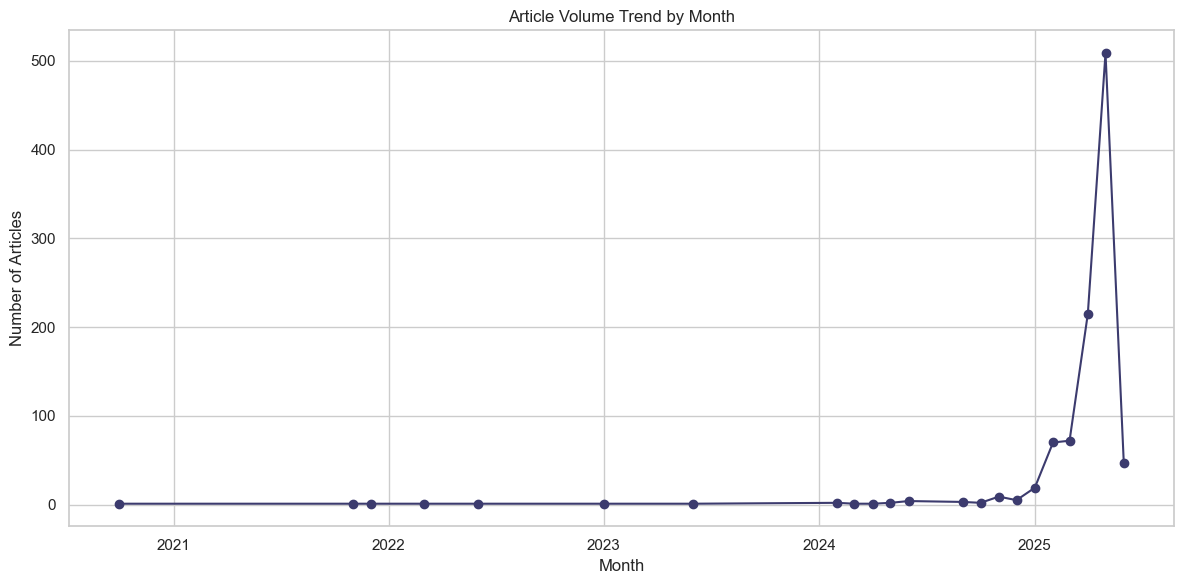

In [53]:
# Ensure 'published_date' is datetime and create 'Month' column
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['Month'] = df['published_date'].dt.to_period('M')

monthly_article_counts = df.groupby('Month').size()
monthly_article_counts.index = monthly_article_counts.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_article_counts.index, monthly_article_counts.values, marker='o', color='#3C3B6E')
plt.title("Article Volume Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

###  Analysis by Country 

In [79]:

import plotly.express as px

df3 = pd.read_csv("combined_sentiment_data.csv")

df3['year'] = pd.to_datetime(df['published_date'], errors='coerce').dt.year

agg_df = df3.groupby(['country_name', 'year']).agg(
    avg_polarity=('polarity', 'mean'),
    positive=('sentiment', lambda x: (x == 'positive').sum()),
    neutral=('sentiment', lambda x: (x == 'neutral').sum()),
    negative=('sentiment', lambda x: (x == 'negative').sum())
).reset_index()

# Add total for hover insights
agg_df['total_articles'] = agg_df['positive'] + agg_df['neutral'] + agg_df['negative']

# Ensure year is sorted and categorical for animation
agg_df = agg_df.sort_values('year')
agg_df['year'] = agg_df['year'].astype(str)
agg_df['year'] = pd.Categorical(agg_df['year'], categories=sorted(agg_df['year'].unique()), ordered=True)

# Plot animated choropleth
fig = px.choropleth(
    data_frame=agg_df,
    locations="country_name",
    locationmode="country names",
    color="avg_polarity",
    hover_name="country_name",
    hover_data=["year", "avg_polarity", "positive", "neutral", "negative"],
    animation_frame="year",
    color_continuous_scale=px.colors.diverging.RdYlGn,
    range_color=[-0.6, 0.6],
    title="Average Sentiment Polarity by Country (Animated by Year)"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


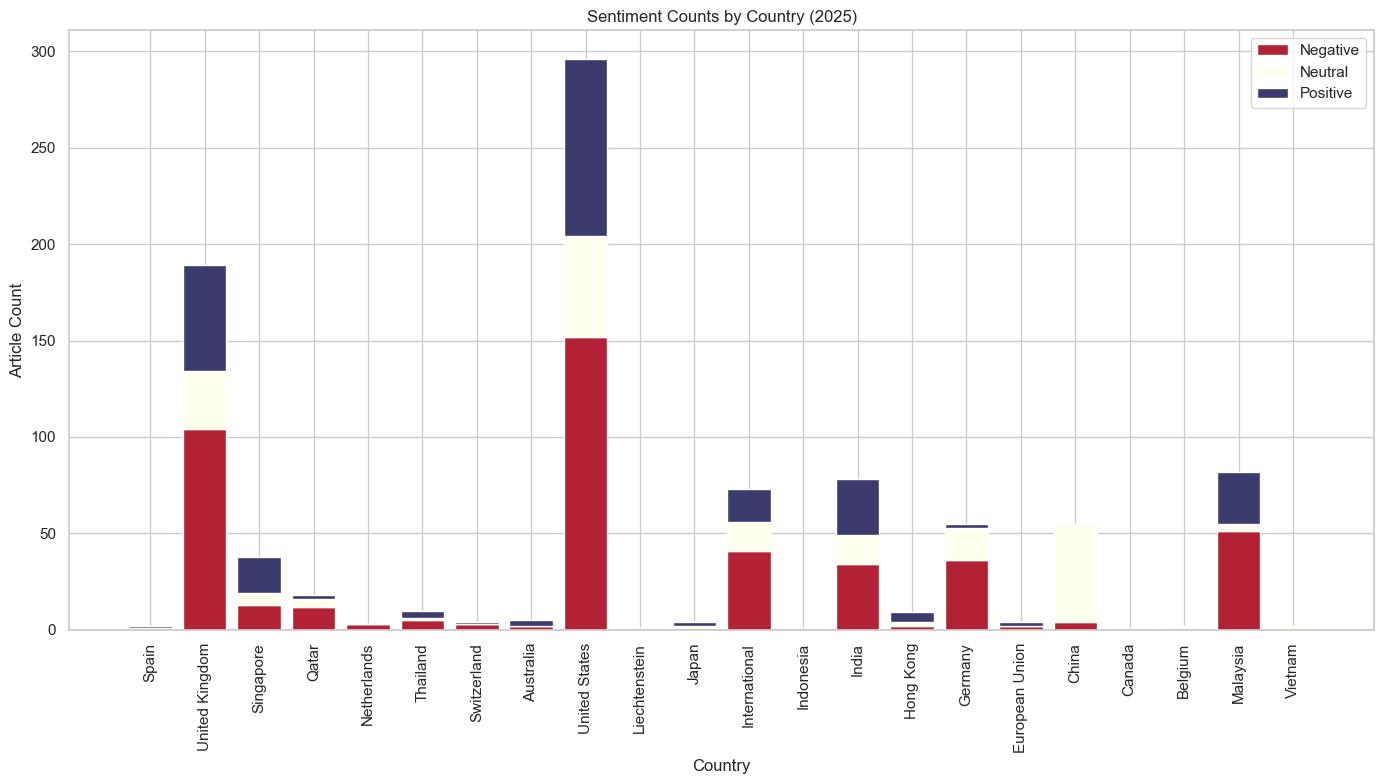

In [85]:
#sentiment count by country in 2025
# Filter only 2025 and ensure values are numeric
year_data = agg_df[agg_df['year'] == '2025'].copy()
for col in ['negative', 'neutral', 'positive']:
    year_data[col] = pd.to_numeric(year_data[col], errors='coerce')

# Plot stacked bar chart with USA colors
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(year_data['country_name'], year_data['negative'], label='Negative', color=usa_colors[2])
ax.bar(year_data['country_name'], year_data['neutral'], bottom=year_data['negative'], label='Neutral', color=usa_colors[1])
bottom = year_data['negative'] + year_data['neutral']
ax.bar(year_data['country_name'], year_data['positive'], bottom=bottom, label='Positive', color=usa_colors[0])

ax.set_title("Sentiment Counts by Country (2025)")
ax.set_ylabel("Article Count")
ax.set_xlabel("Country")
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


why 2025: sentimend trend by year show that 2025 has the lowest sentiment 

### Keyword analysis

In [54]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['Month'] = df['published_date'].dt.to_period('M')
keywords = ['trump', 'tariff', 'china', 'steel','semiconductor','electronics']



C:\Users\Yourisha\AppData\Local\Temp\ipykernel_7792\1277170228.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [56]:

# Function to check if a keyword appears in text
def contains_keyword(text, keyword):
    return keyword.lower() in str(text).lower()

# Create a new column for each keyword
for keyword in keywords:
    df[keyword] = df['description'].apply(lambda x: contains_keyword(x, keyword))

# Group by month and sum the keyword mentions
monthly_keyword_trends = df.groupby('Month')[keywords].sum()
monthly_keyword_trends.index = monthly_keyword_trends.index.to_timestamp()


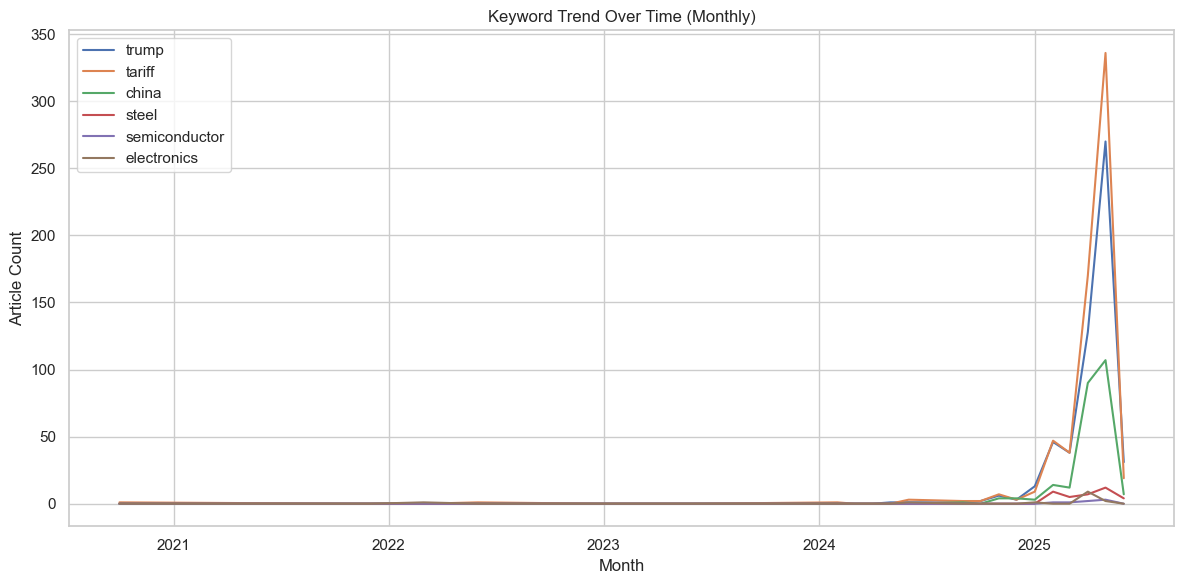

In [57]:

plt.figure(figsize=(12, 6))
for keyword in keywords:
    plt.plot(monthly_keyword_trends.index, monthly_keyword_trends[keyword], label=keyword)

plt.title("Keyword Trend Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Article Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Top 10 Keywords + Trend Over Time

In [58]:
! pip install pandas matplotlib nltk


In [59]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine title + snippet + text into one column
df['full_text'] = df[['title', 'description']].fillna('').agg(' '.join, axis=1)

# Lowercase, remove punctuation
df['clean_text'] = df['full_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# Tokenize each row and filter stopwords and short words
df['tokens'] = df['clean_text'].apply(lambda x: [word for word in x.split() if word not in stop_words and len(word) > 2])

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Lemmatize tokens in each row
df['lemmas'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Flatten all lemmas into one list
all_lemmas = [lemma for lemmas in df['lemmas'] for lemma in lemmas]

# Get top 10 most common lemmatized words
top_10_lemmas = [word for word, count in Counter(all_lemmas).most_common(10)]
print("Top 10 Lemmas:", top_10_lemmas)
# Create a new DataFrame for the top 10 lemmas
top_lemmas_df = pd.DataFrame({
    'lemma': top_10_lemmas,
    'count': [Counter(all_lemmas)[word] for word in top_10_lemmas]
})


Top 10 Lemmas: ['tariff', 'trump', 'trade', 'china', 'donald', 'president', 'import', 'good', 'say', 'war']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [61]:
print(top_10_lemmas)


['tariff', 'trump', 'trade', 'china', 'donald', 'president', 'import', 'good', 'say', 'war']


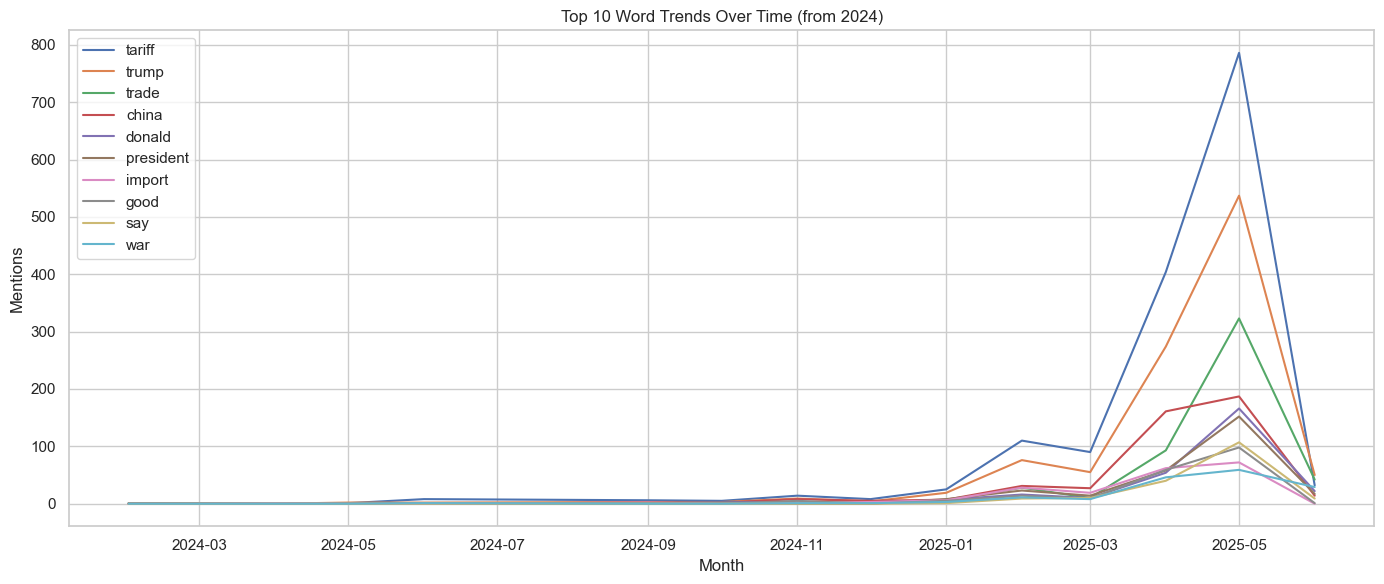

In [62]:
# Compute monthly trends for top 10 lemmatized words
# Create a DataFrame with months as index and top 10 lemmas as columns
word_trends = (
    df.explode('lemmas')
      .groupby(['Month', 'lemmas'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=top_10_lemmas, fill_value=0)
)

# Convert PeriodIndex to timestamp for plotting
word_trends.index = word_trends.index.to_timestamp()

# Filter to start from 2024
word_trends = word_trends[word_trends.index >= pd.Timestamp('2024-01-01')]

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
for lemma in top_10_lemmas:
    if lemma in word_trends.columns:
        plt.plot(word_trends.index, word_trends[lemma], label=lemma)

plt.title("Top 10 Word Trends Over Time (from 2024)")
plt.xlabel("Month")
plt.ylabel("Mentions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


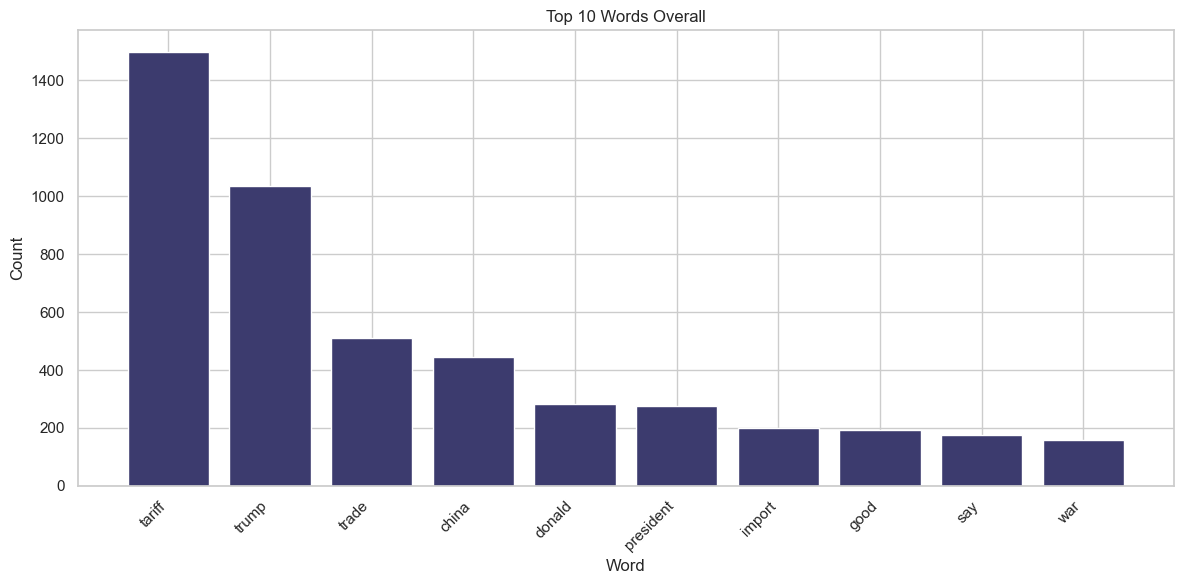

In [63]:
# Get counts for top 10 lemmatized words
lemma_counts = Counter(all_lemmas)
words = top_10_lemmas
counts = [lemma_counts[word] for word in words]

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='#3C3B6E')
plt.title("Top 10 Words Overall")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

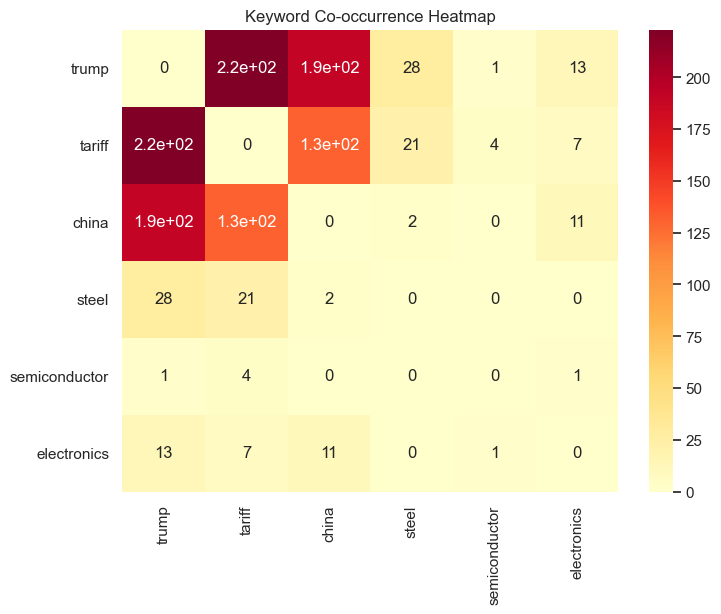

In [64]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Optional: Choose specific keywords to track
keywords = ['trump', 'tariff', 'china', 'steel', 'semiconductor', 'electronics']

# Create co-occurrence matrix
co_occurrence = pd.DataFrame(0, index=keywords, columns=keywords)

# Count co-occurrence per article
for tokens in df['tokens']:
    tokens_set = set(tokens)
    for w1 in keywords:
        for w2 in keywords:
            if w1 != w2 and w1 in tokens_set and w2 in tokens_set:
                co_occurrence.loc[w1, w2] += 1

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, cmap="YlOrRd")
plt.title("Keyword Co-occurrence Heatmap")
plt.show()


Topic Source Analysis

source
BBC                   104
Reuters                74
voachinese.com         54
The Guardian           39
CNN                    27
The New York Times     26
Yahoo Finance          25
astroawani.com         20
Al Jazeera             18
Times of India         15
NPR                    15
Financial Times        15
NBC News               15
PBS                    14
edition.cnn.com        13
Yahoo                  11
The Straits Times      10
CNA                    10
CNBC                   10
Mint                    9
Name: count, dtype: int64


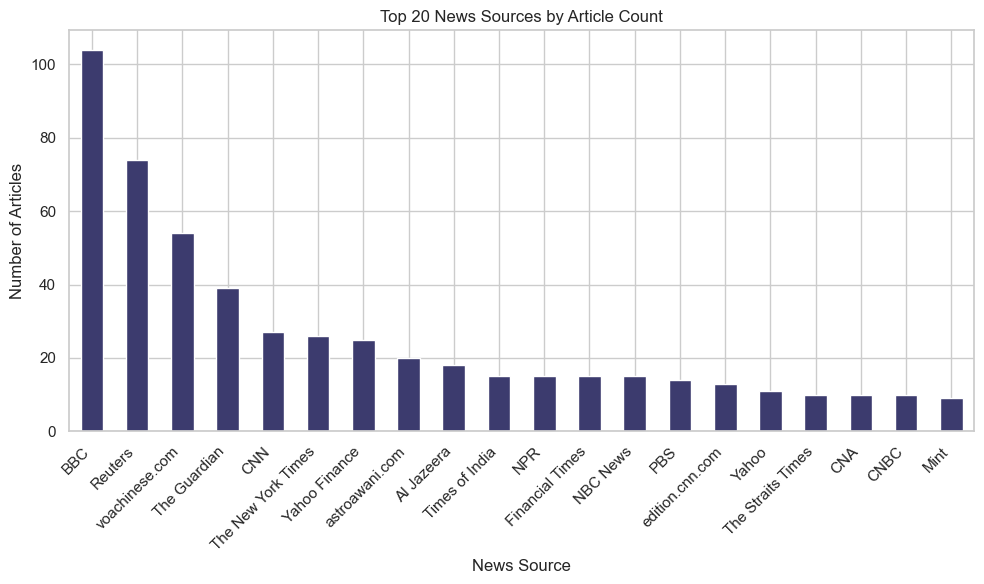

In [65]:
# Count articles by news source
source_counts = df['source'].value_counts().head(20)
print(source_counts)

# Optional: Plot the top 20 sources
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
source_counts.plot(kind='bar', color='#3C3B6E')
plt.title('Top 20 News Sources by Article Count')
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [66]:
#What is each source average sentiment?
source_sentiment = df.groupby('source')['polarity'].mean().sort_values(ascending=False)
print(source_sentiment)

source
Foreign Policy                                0.8481
economictimes.indiatimes.com                  0.8225
Zee News                                      0.8074
Swarajyamag                                   0.7906
Singapore Economic Development Board (EDB)    0.6597
                                               ...  
morgenpost.de                                -0.8316
news.cgtn.com                                -0.8360
CalMatters                                   -0.8360
sueddeutsche.de                              -0.8726
vox.com                                      -0.8834
Name: polarity, Length: 239, dtype: float64


In [67]:
# Get the top 20 news sources by article count
top_sources = df['source'].value_counts().head(20).index

# average sentiment polarity for the top 20 news sources
top20_sentiment = (
    df[df['source'].isin(top_sources)]
    .groupby('source')['polarity']
    .mean()
    .reindex(top_sources)
)

print(top20_sentiment)

source
BBC                  -0.128009
Reuters              -0.175911
voachinese.com       -0.005102
The Guardian         -0.181549
CNN                  -0.063759
The New York Times   -0.005935
Yahoo Finance        -0.211588
astroawani.com       -0.043665
Al Jazeera           -0.240072
Times of India       -0.123307
NPR                  -0.097900
Financial Times      -0.092440
NBC News             -0.237207
PBS                  -0.049086
edition.cnn.com      -0.551731
Yahoo                 0.123000
The Straits Times     0.109900
CNA                  -0.103380
CNBC                  0.216090
Mint                 -0.149978
Name: polarity, dtype: float64


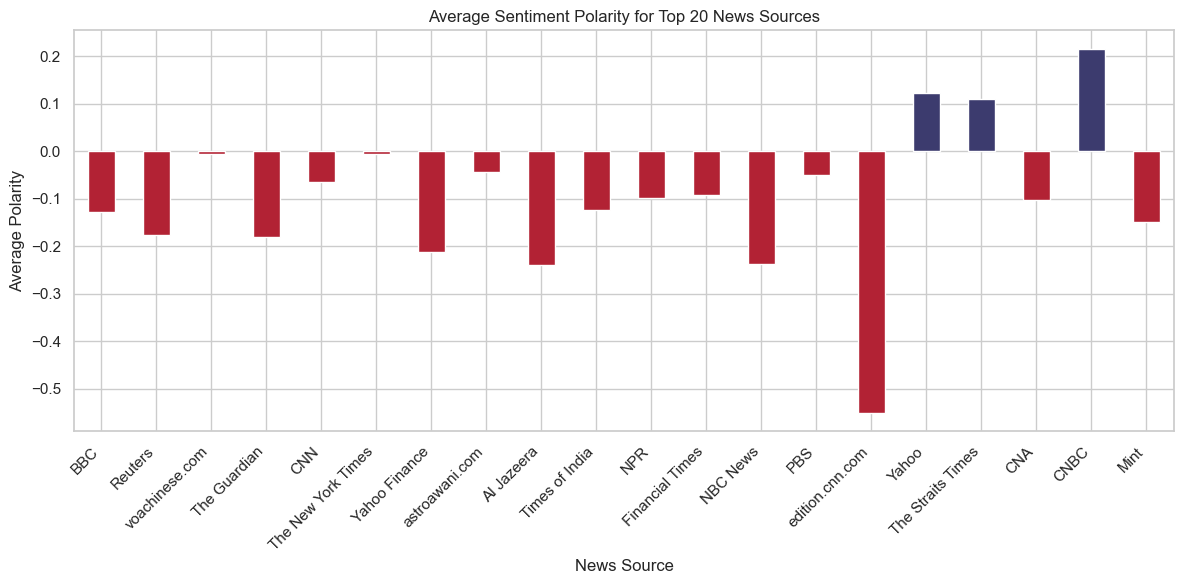

In [68]:
# Assign colors: red for negative, blue for positive
colors = ['#B22234' if val < 0 else '#3C3B6E' for val in top20_sentiment]

plt.figure(figsize=(12, 6))
top20_sentiment.plot(kind='bar', color=colors)
plt.title('Average Sentiment Polarity for Top 20 News Sources')
plt.xlabel('News Source')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

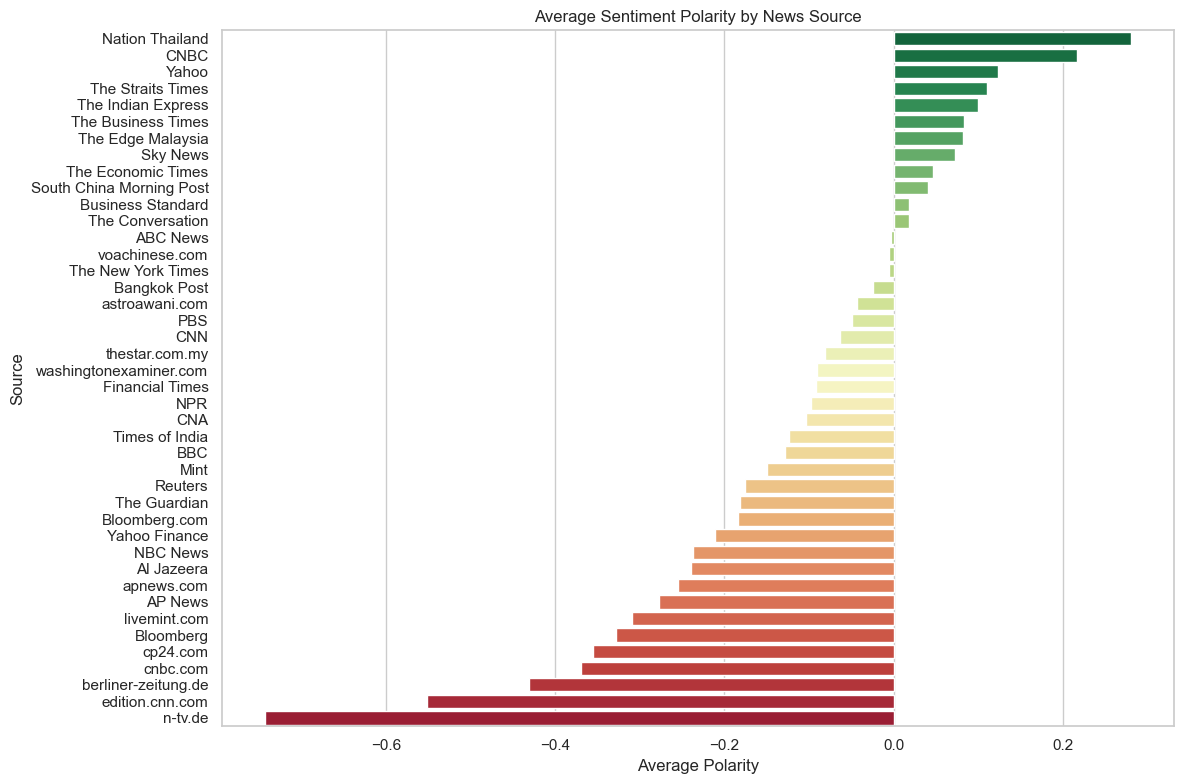

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Remove empty/null source values
df_filtered = df[df['source'].notna() & (df['source'] != '')]

# Group by source and calculate average polarity
source_sentiment = (
    df_filtered.groupby('source')['polarity']
    .agg(['count', 'mean'])
    .sort_values(by='mean', ascending=False)
)

# Optional: filter out sources with very few articles (e.g., < 5)
source_sentiment = source_sentiment[source_sentiment['count'] >= 5]

# Plot: Average polarity per source
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=source_sentiment.index, data=source_sentiment, palette='RdYlGn_r')
plt.title("Average Sentiment Polarity by News Source")
plt.xlabel("Average Polarity")
plt.ylabel("Source")
plt.tight_layout()
plt.show()


In [70]:
# Count number of articles for each author
author_article_counts = df1['authors'].value_counts()
author_article_counts

authors
Natalie Sherman                                8
Peter Hoskins                                  6
Helen Davidson                                 6
Laura Bicker                                   5
Elisabeth Buchwald                             4
                                              ..
Laura Miller                                   1
Michael Acton, Daniel Thomas, Aime Williams    1
Deepali Bhargava                               1
Aime Williams, Jim Pickard, Peter Foster       1
Shola Lawal                                    1
Name: count, Length: 415, dtype: int64

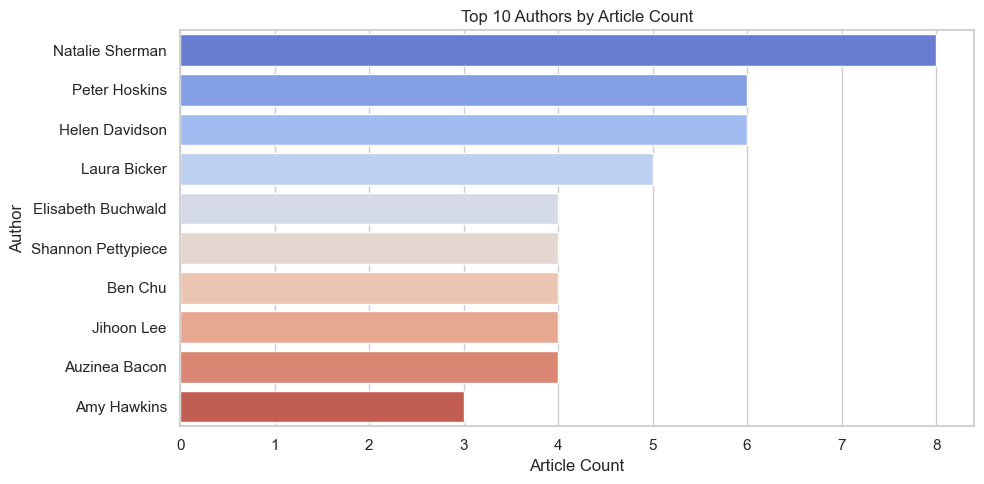

In [71]:
# Top 10 authors by number of articles

## use dataset with authors
df1 = pd.read_csv("Data/merged_noDuplicate.csv")

author_counts = df1['authors'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title("Top 10 Authors by Article Count")
plt.xlabel("Article Count")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

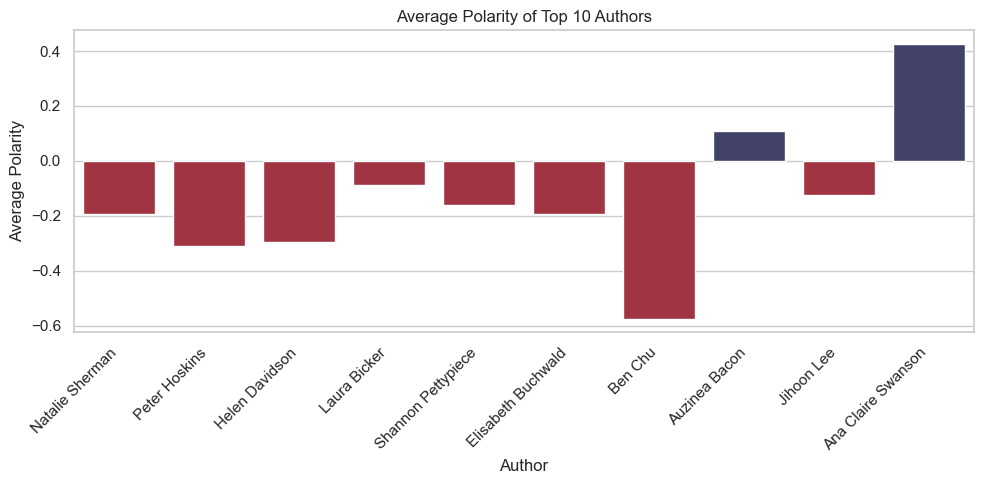

In [ ]:
# 4. Average Polarity per Author (Top 10 by volume)
author_sentiment = (
    df1[df1['authors'].notna() & (df1['authors'] != '')]
    .groupby('authors')['polarity']
    .agg(['count', 'mean'])
    .sort_values(by='count', ascending=False)
    .head(10)
)

colors = ['#B22234' if val < 0 else '#3C3B6E' for val in author_sentiment['mean']]

plt.figure(figsize=(10, 5))
sns.barplot(y=author_sentiment['mean'], x=author_sentiment.index, palette=colors)
plt.title("Average Polarity of Top 10 Authors (by Article Count)")
plt.ylabel("Average Polarity")
plt.xlabel("Author")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



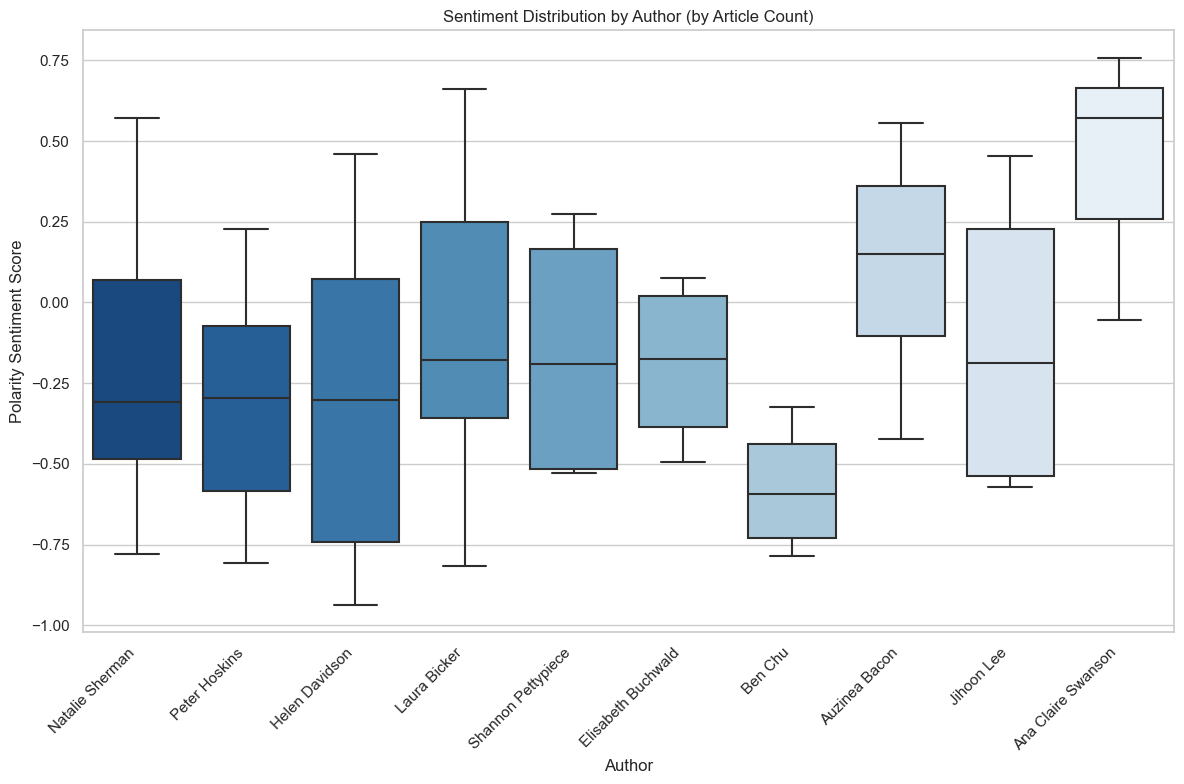

In [76]:
# 5. Sentiment Distribution by Author (Top 10 by volume) - Swapped axes
plt.figure(figsize=(12, 8))
top10_authors = author_sentiment.index
filtered = df1[df1['authors'].isin(top10_authors)]
sns.boxplot(
    data=filtered,
    x='authors',
    y='polarity',  # Now polarity is on y-axis
    order=top10_authors,
    palette='Blues_r'
)
plt.title("Sentiment Distribution by Author (by Article Count)")
plt.xlabel("Author")
plt.ylabel("Polarity Sentiment Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()